In [ ]:
# Hello Group 37. Question 2 code here

In [ ]:
2.1 #In this part, you will build a model to forecast the hourly carpark availability in the future (aggregated across all carparks instead of looking at each carpark individually). 
# Can you explain why you may want to forecast the carpark availability in the future? Who would find this information valuable? What can you do if you have a good forecasting model?

#Ans 2.1: In our opinion, it would be important to forecast the carpark availability in the future as we can check on how many carpark slots are available for future users who wish to visit an area and use the carpark to park their cars.
# This is good for the management team who would find this information valuable, in order to prepare themselves for demand-supply fluctuations and act accordingly to meet customer demands, especially during peak hours in malls for example, where carpark slots are usually full in the evenings in Singapore.
# This can be also useful for the management team if they need to check on how many sensors would be needed to be checked and replaced if faulty during that period of time if carpark slots are used by cars, so if more slots are available for example.
# The managenent team can use that time to replace malfuncting sensors so that customers dont complain when the light sensors for example, dosent work when they park their cars in the parking lots. 
# These inspection processes would be more efficient if their forecasting model is good so that the security team knows exactly when to go and replace the sensors if the carpark lots are empty at one particular time and which ones in particular. 
# Predictive and Prescriptive analytics can be done if you have a good forecasting model for management and security teams to equip their forces accordingly if they need to do car control to preserve lots in the carpark as well, especially if demand > supply of lots available and increase prices accordingly if needed for more revenue

In [ ]:
import requests
import json 
import pandas as pd

def get_data_clean(year, month, day, hour, minute, second):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
    try: 
        response_API = requests.get(site)
        data = response_API.text
        data = json.loads(data)
        df = pd.DataFrame()
        real_data = data["items"][0]["carpark_data"]
        with open("EE4211data.json", 'w') as fp:
            json.dump(real_data, fp)
        df = pd.read_json("EE4211data.json")
        for heading in ("total_lots","lot_type","lots_available"):
            df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
        df = df.drop(["carpark_info"], axis=1)
    except (KeyError, IndexError) as e:
        return None
    
    return df

In [ ]:
def get_percent(num, denum):
    if denum == 0:
        return -1
    return float(num)/float(denum)

In [ ]:
def get_hourly_data_month(year, month):
    percentage_list = []   
    for d in range (1,32):
        print("Executing day", d)
        # Format: carpark_number	update_datetime	total_lots	lot_type	lots_available
        for h in range(0,24):
            lot_avail = 0
            lot_tot = 0
            
            data = get_data_clean(year, month, str(d), str(h), "00", "00")
            
            # Handle retrival error as no data (-1)
            if data is None:
                print("No data for day", d, "hour", h)
                percentage_list.append(-1)
                continue
                
            # Aggregate data by lot type
            for _, row in data.iterrows():
                if int(row["total_lots"]) < int(row["lots_available"]):
                    # Possible error data
                    continue
                    
                lot_avail += int(row["lots_available"])
                lot_tot += int(row["total_lots"])
                                    
            percentage_list.append(get_percent(lot_avail,lot_tot))
            
    return percentage_list

In [ ]:
july_data = get_hourly_data_month("2022", "7") #All training data gathering
july_data

Executing day 1
No data for day 1 hour 0
Executing day 2
No data for day 2 hour 0
Executing day 3
No data for day 3 hour 0
Executing day 4
No data for day 4 hour 0
Executing day 5
No data for day 5 hour 0
No data for day 5 hour 17
Executing day 6
No data for day 6 hour 0
Executing day 7
No data for day 7 hour 0
Executing day 8
No data for day 8 hour 0
No data for day 8 hour 20
Executing day 9
No data for day 9 hour 0
Executing day 10
No data for day 10 hour 0
Executing day 11
No data for day 11 hour 0
Executing day 12
No data for day 12 hour 0
Executing day 13
No data for day 13 hour 0
Executing day 14
No data for day 14 hour 0
Executing day 15
No data for day 15 hour 0
Executing day 16
No data for day 16 hour 0
Executing day 17
No data for day 17 hour 0
Executing day 18
No data for day 18 hour 0
Executing day 19
No data for day 19 hour 0
Executing day 20
No data for day 20 hour 0
Executing day 21
No data for day 21 hour 0
Executing day 22
No data for day 22 hour 0
Executing day 23
No 

[-1,
 0.46543219948753617,
 0.45823501260072974,
 0.4549599839520776,
 0.45754438974989003,
 0.45795603520281447,
 0.46624140066803815,
 0.5305150358833642,
 0.598632870570762,
 0.652344614635442,
 0.666510488147709,
 0.6767593621209879,
 0.6766122974642307,
 0.6724590535781958,
 0.6814237215037294,
 0.6779420597116548,
 0.6728431357628767,
 0.6650875608416795,
 0.6473054066127384,
 0.6110496305169996,
 0.5778187537435141,
 0.5531296816576544,
 0.5377850077256234,
 0.5114996914784409,
 -1,
 0.47796195257556584,
 0.46802087483950944,
 0.46266332763152984,
 0.4624660763044543,
 0.4618289304244027,
 0.4666478685569825,
 0.4873422885806076,
 0.5222449496102,
 0.559377597895264,
 0.5819620581222572,
 0.6017433509022,
 0.6118043593068685,
 0.6087555633645956,
 0.6056578064587527,
 0.6012555351587195,
 0.5988159479260424,
 0.5962323516766684,
 0.5961082126939157,
 0.5914369493353988,
 0.577720902563535,
 0.559639028208181,
 0.5427236749097056,
 0.5161008345712207,
 -1,
 0.4849059526872439,
 0

In [ ]:
august_data = get_hourly_data_month("2022", "8") #All testing data gathering
august_data

Executing day 1
No data for day 1 hour 0
Executing day 2
No data for day 2 hour 0
Executing day 3
No data for day 3 hour 0
Executing day 4
No data for day 4 hour 0
Executing day 5
No data for day 5 hour 0
Executing day 6
No data for day 6 hour 0
No data for day 6 hour 7
Executing day 7
No data for day 7 hour 0
Executing day 8
No data for day 8 hour 0
Executing day 9
No data for day 9 hour 0
Executing day 10
No data for day 10 hour 0
Executing day 11
No data for day 11 hour 0
Executing day 12
No data for day 12 hour 0
Executing day 13
No data for day 13 hour 0
Executing day 14
No data for day 14 hour 0
Executing day 15
No data for day 15 hour 0
Executing day 16
No data for day 16 hour 0
Executing day 17
No data for day 17 hour 0
Executing day 18
No data for day 18 hour 0
Executing day 19
No data for day 19 hour 0
Executing day 20
No data for day 20 hour 0
No data for day 20 hour 6
Executing day 21
No data for day 21 hour 0
No data for day 21 hour 1
Executing day 22
No data for day 22 ho

[-1,
 0.47069426058184044,
 0.46522575763234963,
 0.4628741554451147,
 0.46117366143233784,
 0.4626834909340401,
 0.4724105728456893,
 0.5346567250895711,
 0.6046584100409138,
 0.6592204974659042,
 0.6770654449971748,
 0.6830343125796193,
 0.6811273614661841,
 0.6760952124016851,
 0.6873729722251046,
 0.6857463399923363,
 0.6816704058372582,
 0.6712115385147455,
 0.6476056638039661,
 0.5947605080384073,
 0.5532102108043271,
 0.5278362862639285,
 0.5098246750012452,
 0.49061707803819554,
 -1,
 0.468409863298675,
 0.46306344945903316,
 0.4611204747479077,
 0.46211199889315485,
 0.4631514435481305,
 0.47242033378666487,
 0.5349197522154254,
 0.6062596086845918,
 0.6611580874220236,
 0.6796298753718387,
 0.6866269949953938,
 0.6861607933415973,
 0.6800546009758472,
 0.6931915635253044,
 0.6913721849503367,
 0.6862539349422875,
 0.6769328170768288,
 0.655027025532562,
 0.6001051132041547,
 0.5523136968530182,
 0.5229282654653724,
 0.5041389881059426,
 0.48307028025801885,
 -1,
 0.4597573658

In [ ]:
# Save july df to csv 
df = pd.DataFrame(july_data) 
    
# Saving the dataframe for all training data 
df.to_csv('july.csv') 
df

In [ ]:
# Save august df to csv 
df = pd.DataFrame(august_data) 
    
# Saving the dataframe for all testing data 
df.to_csv('august.csv') 
df

,0
0,-1.000000
1,0.470694
2,0.465226
3,0.462874
4,0.461174
...,...
739,0.609899
740,0.566994
741,0.538647
742,0.515611


In [1]:
# Question 2.2 (i) Time series plot of the actual and predicted hourly values using Linear Regression  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as st
from sklearn.metrics import mean_squared_error

july_df = pd.read_csv('july.csv', index_col = 0) #Training Dataset
august_df = pd.read_csv('august.csv', index_col = 0) #Test Dataset
july_df

,0
0,-1.000000
1,0.465432
2,0.458235
3,0.454960
4,0.457544
...,...
739,0.552224
740,0.540564
741,0.525465
742,0.507949


In [2]:
# Removed "-1" or missing data entries
filtered_july_df = july_df[july_df['0']> -1]
filtered_august_df = august_df[august_df['0']> -1]

In [3]:
#Separate the features from the label
X_train = filtered_july_df.index.values.reshape(-1, 1)
y_train = filtered_july_df.iloc[:,0].values
X_test = filtered_august_df.index.values.reshape(-1, 1)
y_test = filtered_august_df.iloc[:,0].values
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

711
711
709
709


In [4]:
import sklearn.linear_model as lm

# Train and run Linear Regressor model
def run_lr_model(x_july, y_july, x_august):
    # We create the Linear Regression model.
    lr = lm.LinearRegression()

    # We train the model on our training dataset.
    lr.fit(x_july, y_july)
     
    # Now, we predict points with our trained model.
    y_pred_lr = lr.predict(x_august) 

    return lr, y_pred_lr

# Run Linear regresion model
lr, y_pred_lr = run_lr_model(X_train,y_train,X_test)  

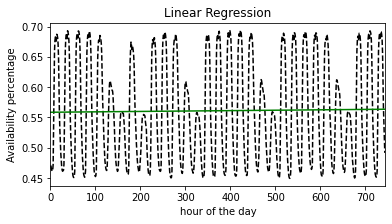

In [5]:
# Plot time series graph
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.xlim([0, 744])
ax.plot(X_test, y_test, '--k')
ax.plot(X_test, y_pred_lr, 'g')
ax.set_title("Linear Regression")
plt.xlabel("hour of the day")
plt.ylabel("Availability percentage")
plt.show()

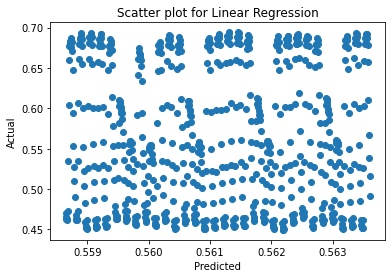

In [6]:
# Question 2.2 (ii) Scatter plot of actual vs predicted hourly values (along with a line showing how good the fit is)
plt.title("Scatter plot for Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(y_pred_lr, y_test)
plt.show()

RMS: 0.007714472526759998


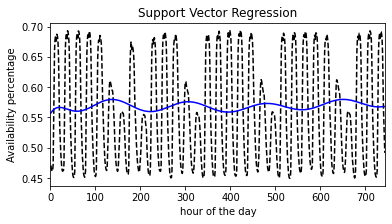

In [12]:
# Question 2.3 (i) Do the same as Question 2.2 above but use support vector regressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train and run DT Regressor model
def run_svr_model(x_july, y_july, x_august):
    # Implement the SVR with rbf classifier
    svr = SVR(C=10000, kernel='rbf', gamma='scale') 

    # We train the model on our training dataset.
    svr.fit(x_july, y_july)
     
    # Now, we predict points with our trained model.
    y_pred_svr = svr.predict(x_august) 

    return svr, y_pred_svr

# Run SVR model
svr, y_pred_svr = run_svr_model(X_train,y_train,X_test) 

print("RMS:", mean_squared_error(y_test, y_pred_svr))

# Plot time series graph
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.xlim([0, 744])
ax.plot(X_test, y_test, '--k')
ax.plot(X_test, y_pred_svr, 'b')
ax.set_title("Support Vector Regression")
plt.xlabel("hour of the day")
plt.ylabel("Availability percentage")
plt.show()

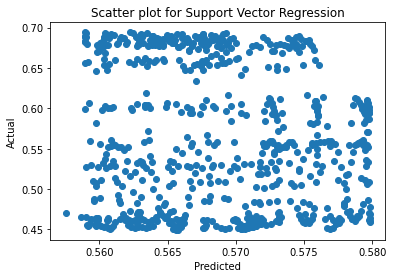

In [13]:
# Question 2.3 (ii) Scatter plot of actual vs predicted hourly values (along with a line showing how good the fit is)
plt.title("Scatter plot for Support Vector Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(y_pred_svr, y_test)
plt.show()

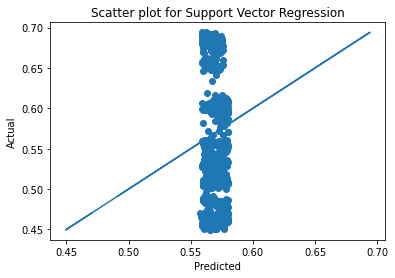

In [14]:
# Question 2.3 (ii) Scatter plot of actual vs predicted hourly values (along with a line showing how good the fit is)
plt.title("Scatter plot for Support Vector Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(y_pred_svr, y_test)
plt.plot(y_test, y_test)
plt.show()

RMS: 0.003692646860973911


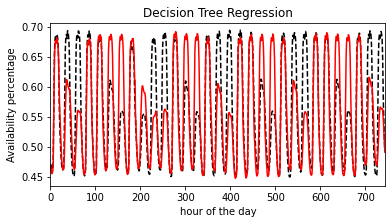

In [10]:
# Question 2.4 (i) Do the same as Question 2.2 above but use decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train and run DT Regressor model
def run_dtr_model(x_july, y_july, x_august):
    # Implement the DT regressor
    dtr = DecisionTreeRegressor(criterion="absolute_error", max_depth=30) 

    # We train the model on our training dataset.
    dtr.fit(x_july, y_july)
     
    # Now, we predict points with our trained model.
    y_pred_dtr = dtr.predict(x_august) 

    return dtr, y_pred_dtr

# Run SVR model
dtr, y_pred_dtr = run_dtr_model(X_train,y_train,X_test)

print("RMS:", mean_squared_error(y_test, y_pred_dtr))

# Plot time series graph
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.xlim([0, 744])
ax.plot(X_test, y_test, '--k')
ax.plot(X_test, y_pred_dtr, 'r')
ax.set_title("Decision Tree Regression")
plt.xlabel("hour of the day")
plt.ylabel("Availability percentage")
plt.show()

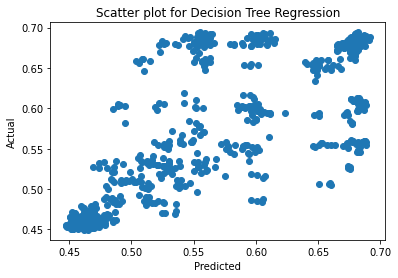

In [11]:
# Question 2.4 (ii) Scatter plot of actual vs predicted hourly values (along with a line showing how good the fit is)
plt.title("Scatter plot for Decision Tree Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(y_pred_dtr, y_test)
plt.show()

In [ ]:
# Question 2.5 is written below

Based on the models above, we have conducted hyperparameter tuning based on the model types as described below:
1. Linear Regresion:

We decided not to conduct a hyperparameter tuning for linear regression because our team thinks that support vector or decision tree would be a better model.

2. Support Vector Regressor:

For this model, we have tried out various criterion and find out that "rbf" is the most accurate. Moreover, we reliased that the C-value greatly affects the performance of our model. Below we run the model on different C values:
- At C = 10000, the MSE = 0.007714472526759998
- At C = 100, the MSE = 0.007846602584232764
- At C = 10, the MSE = 0.007672092935722608
- At C = 1, the MSE = 0.007586482084357083
- At C = 1e-5, the MSE = 0.007525958288712092

From this we can observe that at C = 10000, we have underfitting as the MSE continues to drop as we increase the C. Moreover, we can observe the underfitting on the generated time-series graph too. On the other hand, at C = 100, we can observe more overfitting as the testing MSE continues to decline after that. However, we will chose C = 10000 as we can observe the results on the time series graph better as it provides a better approximation of the graph, and only a straight line is observed when C=1e-5, which does not approximate the training data properly and learn it. 

3. Decision Tree Regression:

For this model, we have tried out various criterion and find out that "absolute_error" is the most accurate. Moreover, we realised that "max_depth" greatly affects the performance of our model. Below we run the model on different "criterion" values:
- At criterion = "poisson" & max_depth = 30, MSE = 0.003704351641855609
- At criterion = "absolute_error" & max_depth = 30, MSE = 00.003692646860973911
- At criterion = "friedman_mse" & max_depth = 30, MSE = 0.004318105892268358
- At criterion = "squared_error" & max_depth = 30, MSE = 0.004318105892268358

- At criterion = "poisson" & max_depth = 50, MSE = 0.0036925104139517227
- At criterion = "absolute_error" & max_depth = 50, MSE = 0.0036925104139517227
- At criterion = "friedman_mse" & max_depth = 50, MSE = 0.0036925104139517227
- At criterion = "squared_error" & max_depth = 50, MSE = 0.0036925104139517227

- At criterion = "poisson" & max_depth = 25, MSE = 0.0044069059456647
- At criterion = "absolute_error" & max_depth = 25, MSE = 0.003709518785274451
- At criterion = "friedman_mse" & max_depth = 25, MSE = 0.0048300224750047705
- At criterion = "squared_error" & max_depth = 25, MSE = 0.0048300224750047705

From this we can observe that at max_depth = 25, we have underfitting as the MSE continues to drop as we increase the max_depth. On the other hand, at max_depth = 50, we can observe overfitting as the MSE value is the same for all criterion. This leads to our conclusion that criterion = "absolute_error" & max_depth = 30 is the optimal value for this model as it neither overfits nor underfits.

In conclusion, the model we would pick Decision Tree Regression as our model of choice.